In [ ]:
import numpy as np
from numpy.matlib import repmat
import sys
import time

from helper import *

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import linregress

import pylab
from matplotlib.animation import FuncAnimation

%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.10.12


In [ ]:
xTr, yTr = generate_data()
visualize_2D(xTr, yTr)

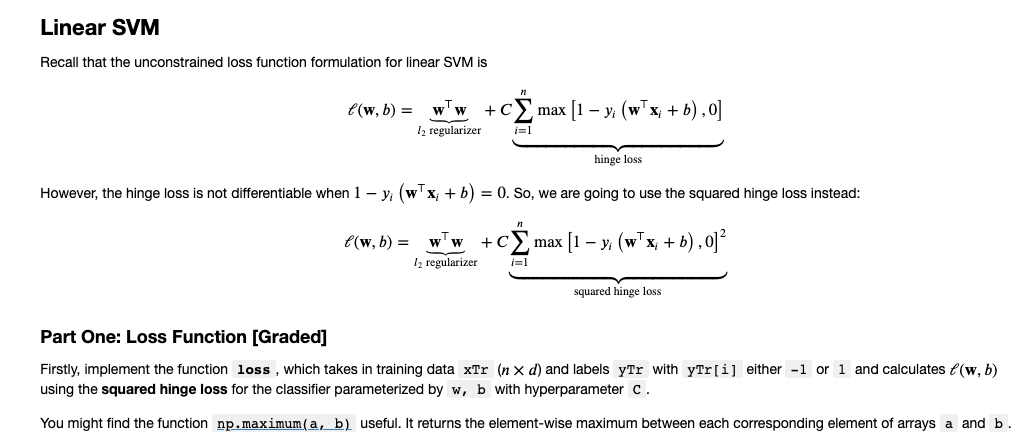

In [ ]:
def loss(w, b, xTr, yTr, C):
    """
    Calculates the squared hinge loss plus the l2 regularizer, as defined in the equation above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)

    Output:
        loss_val : squared loss plus the l2 regularizer for the classifier on xTr and yTr, a scalar
    """

    loss_val = 0.0

    L2 = np.dot(w.T, w)
    pred = np.dot(xTr, w.T) + b
    hinge = np.maximum(0, 1- np.multiply(yTr,pred)) #elemement-wise maximum of two arrays
    sq_hinge = np.sum(np.square(hinge))

    loss_val = L2 + C*sq_hinge

    return float(loss_val)

In [ ]:
def loss(w, b, xTr, yTr, C):
    """
    Calculates the squared hinge loss plus the l2 regularizer, as defined in the equation above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)

    Output:
        loss_val : squared loss plus the l2 regularizer for the classifier on xTr and yTr, a scalar
    """

    loss_val = 0.0

    L2 = np.dot(w.T, w) #w,w also works as no need to .T as it will be broadcast correctly to (1,d)
    pred = np.dot(xTr, w) + b #array times vector, keep xTr in place as each row is input vector, w becomes (d,1) to make dot product work
    hinge = np.maximum(0, 1- np.multiply(yTr,pred)) #elemement-wise maximum of two arrays
    sq_hinge = np.sum(np.square(hinge))

    loss_val = L2 + C*sq_hinge

    return float(loss_val)

In [ ]:
# These tests test whether your loss() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Check whether your loss() returns a scalar
def loss_test1():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    return np.isscalar(loss_val)

# Check whether your loss() returns a nonnegative scalar
def loss_test2():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)

    return loss_val >= 0

# Check whether you implement l2-regularizer correctly
def loss_test3():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 0)
    loss_val_grader = loss_grader(w, b, xTr_test, yTr_test, 0)

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implemented the squared hinge loss and not the standard hinge loss
# Note, loss_grader_wrong is the wrong implementation of the standard hinge-loss,
# so the results should NOT match.
def loss_test4():
    w = np.random.randn(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 1)
    badloss = loss_grader_wrong(w, b, xTr_test, yTr_test, 1)
    return not(np.linalg.norm(loss_val - badloss) < 1e-5)


# Check whether you implement square hinge loss correctly
def loss_test5():
    w = np.random.randn(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    loss_val_grader = loss_grader(w, b, xTr_test, yTr_test, 10)

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly
def loss_test6():
    w = np.random.randn(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 100)
    loss_val_grader = loss_grader(w, b, xTr_test, yTr_test, 100)

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

runtest(loss_test1,'loss_test1')
runtest(loss_test2,'loss_test2')
runtest(loss_test3,'loss_test3')
runtest(loss_test4,'loss_test4')
runtest(loss_test5,'loss_test5')
runtest(loss_test6,'loss_test6')

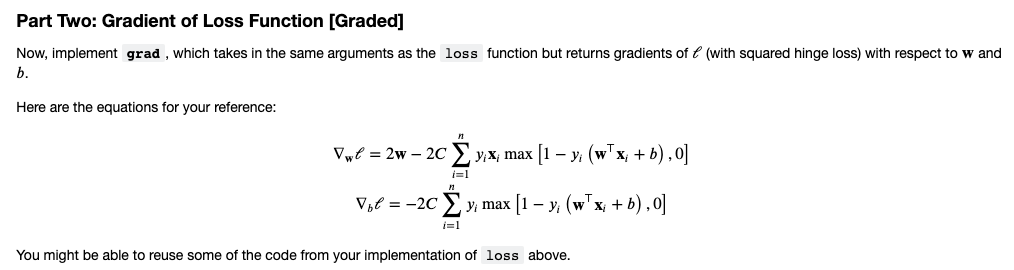

In [ ]:
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)

    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape

    wgrad = np.zeros(d)
    bgrad = np.zeros(1)

    pred = np.dot(xTr, w.T) + b
    margins = 1 - np.dot(yTr, pred.T)
    hinge_mask = margins > 0 # create a mask of the data points that violate the margin

    # gradient with respect to w
    hinge_grad_w = -np.dot(yTr[hinge_mask] * xTr[hinge_mask], margins[hinge_mask])
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(yTr[hinge_mask] * margins[hinge_mask])
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad

In [ ]:
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)

    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape

    pred = np.dot(xTr, w) + b
    margins = 1 - yTr * pred
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    # gradient with respect to w
    hinge_grad_w = -np.dot(yTr[hinge_mask] * xTr[hinge_mask].T, margins[hinge_mask])
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(yTr[hinge_mask] * margins[hinge_mask])
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad


In [ ]:
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)

    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape

    pred = np.dot(xTr, w) + b
    margins = 1 - yTr * pred
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    # gradient with respect to w
    hinge_grad_w = -np.dot(xTr[hinge_mask].T, yTr[hinge_mask] * margins[hinge_mask])
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(yTr[hinge_mask] * margins[hinge_mask])
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad


You're right; if we treat yTr and pred as row vectors, the product yTr * pred will be a scalar. However, if we treat both as column vectors or n-dimensional vectors, then their element-wise multiplication will result in an n-dimensional vector. Given that hinge in the original code is computed using np.maximum(0, 1- np.multiply(yTr,pred)), it appears that yTr and pred are intended to be n-dimensional vectors, not row vectors. Thus, their element-wise product is an n-dimensional vector.

Let's correct the computation:

yTr and pred are treated as n-dimensional vectors, so their element-wise product will also be an n-dimensional vector.
The multiplication for the weight gradient should use a summation, combining the gradients from each data point.
Let's update the gradient calculations:

In [ ]:
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)

    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape

    pred = np.dot(xTr, w) + b
    margins = 1 - yTr * pred
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    # gradient with respect to w
    hinge_grad_w = -np.sum(xTr[hinge_mask].T * (yTr[hinge_mask] * margins[hinge_mask]), axis=1)
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(yTr[hinge_mask] * margins[hinge_mask])
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad


The equation for the gradient with respect to w for the hinge loss term, when expressed for a single data point (x, y), is given by:

minus Y times x times hinge term for that point

Where the hinge term is (1 - y * prediction) if the point lies within the margin (i.e., it's a margin violation), otherwise it's 0.

When you sum over all data points, this becomes a vector sum (one term for each feature/dimension).

The problem with the above line is in the multiplication after the dot product.

To correct it, you should:

Compute the hinge term for each margin-violating point (i.e., compute -y * margin for each such point).
Multiply this hinge term with the corresponding x (row of xTr).
Sum the results for all points to get the gradient.
Here's how you can adjust that:

In [ ]:
violated_x = xTr[hinge_mask]              # shape: (num_violations, d)
violated_y = yTr[hinge_mask]              # shape: (num_violations,)
violated_margins = margins[hinge_mask]    # shape: (num_violations,)

hinge_grad_w = np.sum(violated_x.T * (violated_y * violated_margins), axis=1)


In [ ]:
def grad(w, b, xTr, yTr, C):
    """
    Descriptions...
    """
    n, d = xTr.shape

    pred = np.dot(xTr, w) + b
    margins = 1 - yTr * pred
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    violated_x = xTr[hinge_mask]              # shape: (num_violations, d)
    violated_y = yTr[hinge_mask]              # shape: (num_violations,)
    violated_margins = margins[hinge_mask]    # shape: (num_violations,)

    # gradient with respect to w
    hinge_grad_w = -np.sum(violated_x.T * (violated_y * violated_margins), axis=1)
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(yTr[hinge_mask] * margins[hinge_mask])
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad


In [ ]:
#final version with explained multiplications
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)

    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape

    wgrad = np.zeros(d)
    bgrad = np.zeros(1)

    pred = np.dot(xTr, w) + b
    margins = 1 - yTr * pred #element-wise multiplication, produces same shape n-dimensional array
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    violated_x = xTr[hinge_mask]              # shape: (num_violations, d)
    violated_y = yTr[hinge_mask]              # shape: (num_violations,)
    violated_margins = margins[hinge_mask]    # shape: (num_violations,)

    # gradient with respect to w
    hinge_grad_w = -np.dot(violated_x.T, (violated_y * violated_margins)) #element wise multiplication of the two num_violations arrays, dot product with dxnum_violations requires transpose as first element
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(violated_y * violated_margins)
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad

In [ ]:
# These tests test whether your grad() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Checks whether grad returns a tuple
def grad_test1():
    w = np.random.rand(d)
    b = np.random.rand(1)
    out = grad(w, b, xTr_test, yTr_test, 10)
    return len(out) == 2

# Checks the dimension of gradients
def grad_test2():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
    return len(wgrad) == d and np.isscalar(bgrad)

# Checks the gradient of the l2 regularizer
def grad_test3():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 0)
    wgrad_grader, bgrad_grader = grad_grader(w, b, xTr_test, yTr_test, 0)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the square hinge loss
def grad_test4():
    w = np.zeros(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 1)
    wgrad_grader, bgrad_grader = grad_grader(w, b, xTr_test, yTr_test, 1)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the loss
def grad_test5():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
    wgrad_grader, bgrad_grader = grad_grader(w, b, xTr_test, yTr_test, 10)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

runtest(grad_test1, 'grad_test1')
runtest(grad_test2, 'grad_test2')
runtest(grad_test3, 'grad_test3')
runtest(grad_test4, 'grad_test4')
runtest(grad_test5, 'grad_test5')

# **Obtain the Linear SVM**
By calling the following minimization routine implemented for you in the cell below, you will obtain your linear SVM. Since the objective also includes the  𝑙2
 -regularizer, the output loss that you would see would not be 0. But you can subtract off the regularizer term  𝐰⊤𝐰
  to check that your squared hinge loss is indeed close to 0.

In [ ]:
w, b, final_loss = minimize(objective=loss, grad=grad, xTr=xTr, yTr=yTr, C=1000)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss))
print('The Final Squared Hinge Loss of your model is: {:0.4f}'.format(final_loss - np.dot(w, w)))

The Final Loss of your model is: 0.3879
The Final Squared Hinge Loss of your model is: 0.0001

Visualize the Decision Boundary¶
Now, let's visualize the decision boundary on our linearly separable dataset. Since the dataset is linearly separable, you should obtain  0%
  training error with sufficiently large values of  𝐶
  (e.g.  𝐶>1000
 ).

In [ ]:
%matplotlib notebook
visualize_classfier(xTr, yTr, w, b)

# Calculate the training error
err=np.mean(np.sign(xTr.dot(w) + b)!=yTr)
print("Training error: {:.2f} %".format (err*100))

In [ ]:
Xdata = []
ldata = []

fig = plt.figure()
details = {
    'w': None,
    'b': None,
    'stepsize': 1,
    'ax': fig.add_subplot(111),
    'line': None
}

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Click to add positive point and shift+click to add negative points.')

def updateboundary(Xdata, ldata):
    global details
    w_pre, b_pre, _ = minimize(objective=loss, grad=grad, xTr=np.concatenate(Xdata),
            yTr=np.array(ldata), C=1000)
    details['w'] = np.array(w_pre).reshape(-1)
    details['b'] = b_pre
    details['stepsize'] += 1

def updatescreen():
    global details
    b = details['b']
    w = details['w']
    q = -b / (w**2).sum() * w
    if details['line'] is None:
        details['line'], = details['ax'].plot([q[0] - w[1],q[0] + w[1]],[q[1] + w[0],q[1] - w[0]],'b--')
    else:
        details['line'].set_ydata([q[1] + w[0],q[1] - w[0]])
        details['line'].set_xdata([q[0] - w[1],q[0] + w[1]])


def generate_onclick(Xdata, ldata):
    global details

    def onclick(event):
        if event.key == 'shift':
            # add positive point
            details['ax'].plot(event.xdata,event.ydata,'or')
            label = 1
        else: # add negative point
            details['ax'].plot(event.xdata,event.ydata,'ob')
            label = -1
        pos = np.array([[event.xdata, event.ydata]])
        ldata.append(label)
        Xdata.append(pos)
        updateboundary(Xdata,ldata)
        updatescreen()
    return onclick


cid = fig.canvas.mpl_connect('button_press_event', generate_onclick(Xdata, ldata))
plt.show()

# **Scikit-learn Implementation**
Scikit-learn also provides a Linear SVM Classifier implementation that is easy to use.

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge', C=1000, max_iter=1000, random_state=0)
clf.fit(xTr, yTr)

# Visualize classifier and calculate training error
visualize_classfier(xTr, yTr, clf.coef_, clf.intercept_)

err=np.mean(clf.predict(xTr) != yTr)
print("Training error: {:.2f} %".format (err*100))

# **Build a Kernel SVM**

In [ ]:
import numpy as np
from helper import *
import matplotlib.pyplot as plt
import sys

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.10.12


In this assignment, you need to implement three functions:

1. compute K that computes the kernel function efficiently,
2. loss that calculates the kernelized version of the unconstrained squared hinge loss and the regularizer, and
3. grad that calculates the gradients of the loss with respect to the kernel SVM's model parameters.

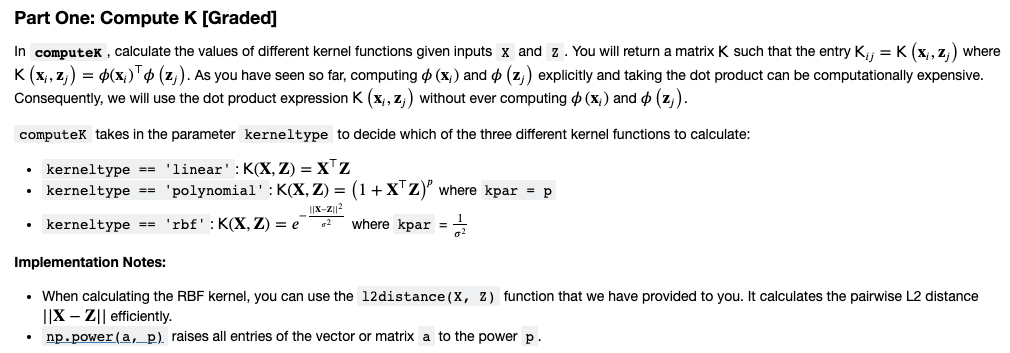

In [ ]:
def computeK(kerneltype, X, Z, kpar=1):
    """
    Computes a matrix K such that K[i, j] = K(x_i, z_j). The kernel operation is defined by kerneltype with parameter kpar.

    Input:
        kerneltype: either of ['linear', 'polynomial', 'rbf']
        X: nxd data matrix
        Z: mxd data matrix
        kpar: kernel parameter (inverse sigma^2 in case of 'rbf', degree p in case of 'polynomial')

    Output:
        K : nxm kernel matrix
    """
    assert kerneltype in ['linear', 'polynomial', 'rbf'], 'Kernel type %s not known.' % kerneltype
    assert X.shape[1] == Z.shape[1], 'Input dimensions do not match'

    K = None

    if kerneltype == 'linear':
        K = np.dot(X, Z.T) #to obtain nxm matrix

    if kerneltype == 'polynomial':
        K = (1 + np.dot(X, Z.T))**(kpar)

    if kerneltype == 'rbf':
        K = np.exp(- np.divide((l2distance(X,Z))**2, (kpar)**2))

    return K

In [ ]:
# These tests test whether your computeK() is implemented correctly

xTr_test, yTr_test = generate_data(100)
xTr_test2, yTr_test2 = generate_data(50)
n, d = xTr_test.shape

# Checks whether computeK compute the kernel matrix with the right dimension
def computeK_test1():
    s1 = (computeK('rbf', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    s2 = (computeK('polynomial', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    s3 = (computeK('linear', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    return (s1 and s2 and s3)

# Checks whether the kernel matrix is symmetric
def computeK_test2():
    k_rbf = computeK('rbf', xTr_test, xTr_test, kpar=1)
    s1 = np.allclose(k_rbf, k_rbf.T)
    k_poly = computeK('polynomial', xTr_test, xTr_test, kpar=1)
    s2 = np.allclose(k_poly, k_poly.T)
    k_linear = computeK('linear', xTr_test, xTr_test, kpar=1)
    s3 = np.allclose(k_linear, k_linear.T)
    return (s1 and s2 and s3)

# Checks whether the kernel matrix is positive semi-definite
def computeK_test3():
    k_rbf = computeK('rbf', xTr_test2, xTr_test2, kpar=1)
    eigen_rbf = np.linalg.eigvals(k_rbf)
    eigen_rbf[np.isclose(eigen_rbf, 0)] = 0
    s1 = np.all(eigen_rbf >= 0)
    k_poly = computeK('polynomial', xTr_test2, xTr_test2, kpar=1)
    eigen_poly = np.linalg.eigvals(k_poly)
    eigen_poly[np.isclose(eigen_poly, 0)] = 0
    s2 = np.all(eigen_poly >= 0)
    k_linear = computeK('linear', xTr_test2, xTr_test2, kpar=1)
    eigen_linear = np.linalg.eigvals(k_linear)
    eigen_linear[np.isclose(eigen_linear, 0)] = 0
    s3 = np.all(eigen_linear >= 0)
    return (s1 and s2 and s3)

# Checks whether computeK compute the right kernel matrix with rbf kernel
def computeK_test4():
    k = computeK('rbf', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('rbf', xTr_test, xTr_test2, kpar=1)

    return np.linalg.norm(k - k2) < 1e-5

# Checks whether computeK compute the right kernel matrix with polynomial kernel
def computeK_test5():
    k = computeK('polynomial', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('polynomial', xTr_test, xTr_test2, kpar=1)

    return np.linalg.norm(k - k2) < 1e-5

# Checks whether computeK compute the right kernel matrix with linear kernel
def computeK_test6():
    k = computeK('linear', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('linear', xTr_test, xTr_test2, kpar=1)

    return np.linalg.norm(k - k2) < 1e-5


runtest(computeK_test1, 'computeK_test1')
runtest(computeK_test2, 'computeK_test2')
runtest(computeK_test3, 'computeK_test3')
runtest(computeK_test4, 'computeK_test4')
runtest(computeK_test5, 'computeK_test5')
runtest(computeK_test6, 'computeK_test6')

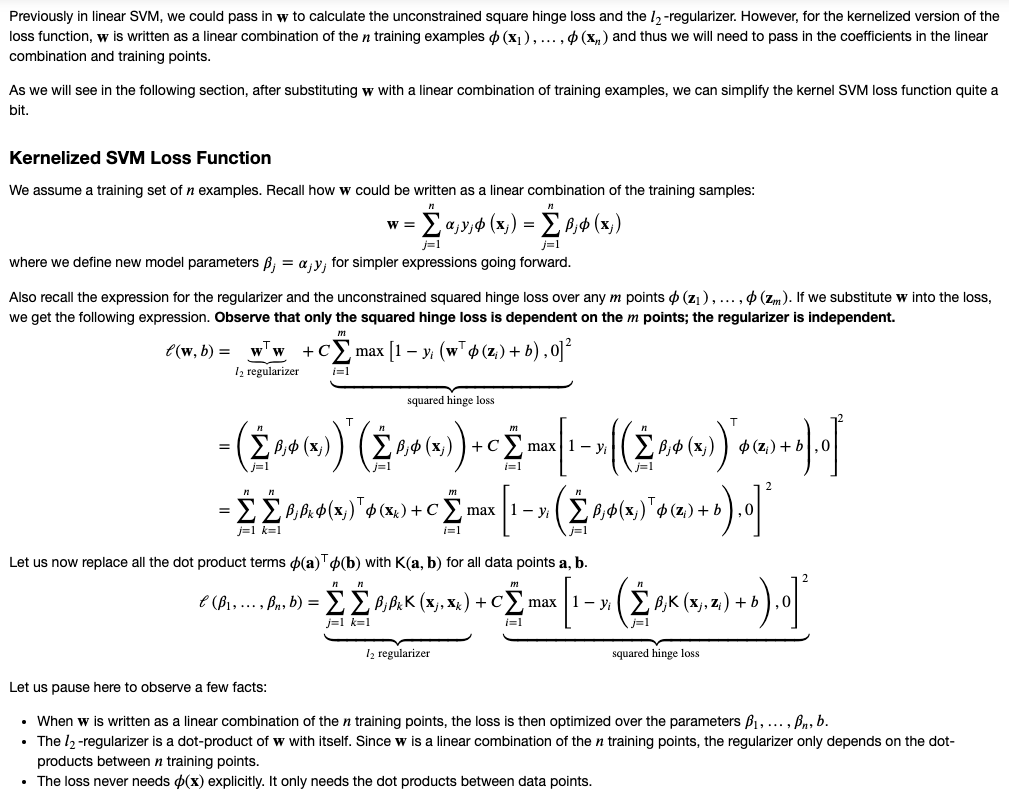

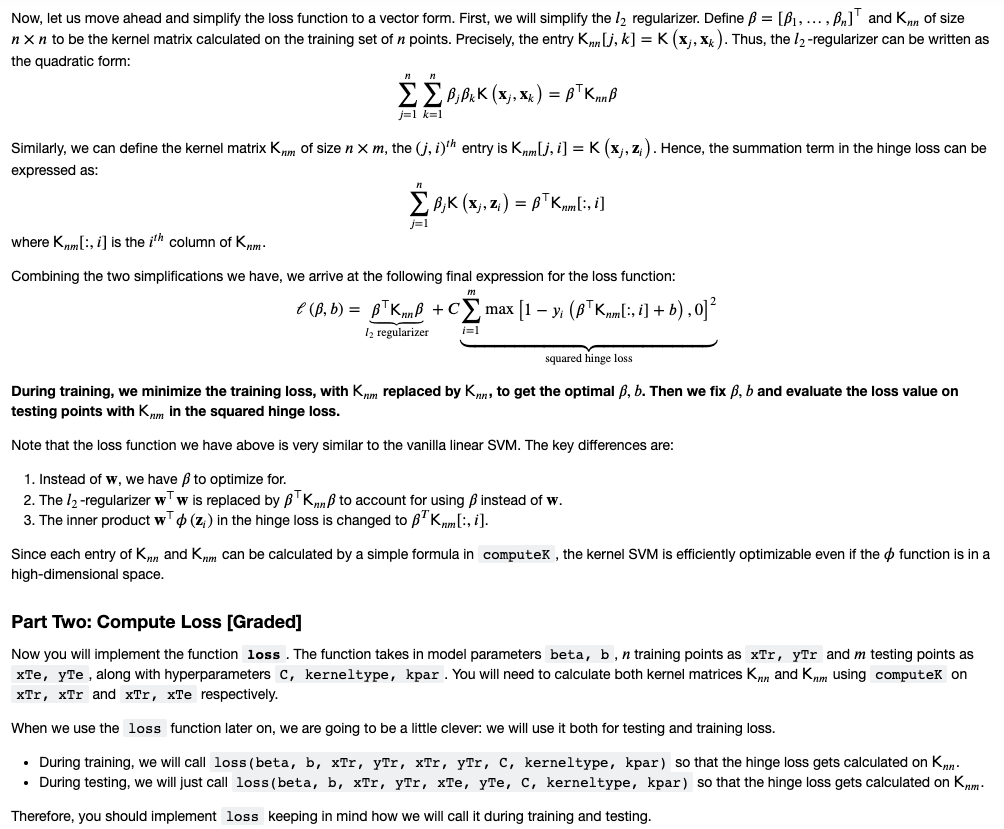

In [ ]:
def loss(beta, b, xTr, yTr, xTe, yTe, C, kerneltype, kpar=1):
    """
    Calculates the loss (regularizer + squared hinge loss) for testing data against training data and parameters beta, b.

    Input:
        beta  : n-dimensional vector that stores the linear combination coefficients
        b     : bias term, a scalar
        xTr   : nxd dimensional data matrix (training set, each row is an input vector)
        yTr   : n-dimensional vector (training labels, each entry is a label)
        xTe   : mxd dimensional matrix (test set, each row is an input vector)
        yTe   : m-dimensional vector (test labels, each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
        kerneltype: either of ['linear', 'polynomial', 'rbf']
        kpar  : kernel parameter (inverse sigma^2 in case of 'rbf', degree p in case of 'polynomial')

    Output:
        loss_val : the total loss obtained with (beta, xTr, yTr, b) on xTe and yTe, a scalar
    """

    loss_val = 0.0

    # compute the kernel values between xTr and xTr
    kernel_train = computeK(kerneltype, xTr, xTr, kpar)

    # compute the kernel values between xTr and xTe
    kernel_test = computeK(kerneltype, xTr, xTe, kpar)

    #L2 regularizer
    l2 = np.dot(np.dot(beta.T, kernel_train), beta)

    if np.array_equal(xTr, xTe) and np.array_equal(yTr, yTe):
      pred = np.dot(beta.T,kernel_train) + b
      hinge = np.maximum(0, 1- np.multiply(yTr,pred))
      sq_hinge = np.sum(np.square(hinge))
      loss_val = l2 + C*sq_hinge

    else:
      pred = np.dot(beta.T,kernel_test) + b
      hinge = np.maximum(0, 1- np.multiply(yTe,pred))
      sq_hinge = np.sum(np.square(hinge))
      loss_val = l2 + C*sq_hinge

    return loss_val

In [ ]:
# These tests test whether your loss() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Check whether your loss() returns a scalar
def loss_test1():
    beta = np.zeros(n)
    b = np.zeros(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')

    return np.isscalar(loss_val)


# Check whether your loss() returns a nonnegative scalar
def loss_test2():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')

    return loss_val >= 0

# Check whether you implement l2-regularizer correctly
def loss_test3():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test4():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test5():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly
def loss_test6():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 100, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 100, 'rbf')

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly for testing data
def loss_test7():
    xTe_test, yTe_test = generate_data()
    m, _ = xTe_test.shape

    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTe_test, yTe_test, 100, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTe_test, yTe_test, 100, 'rbf')

    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

runtest(loss_test1,'loss_test1')
runtest(loss_test2,'loss_test2')
runtest(loss_test3,'loss_test3')
runtest(loss_test4,'loss_test4')
runtest(loss_test5,'loss_test5')
runtest(loss_test6,'loss_test6')
runtest(loss_test7,'loss_test7')

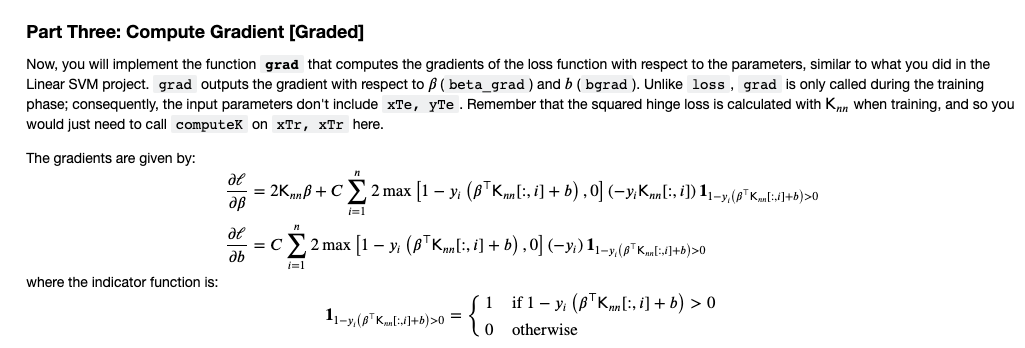

In [ ]:
#kernel SVM
def grad(beta, b, xTr, yTr, C, kerneltype, kpar=1):
    """
    Calculates the gradients of the loss function with respect to beta and b.

    Input:
        beta  : n-dimensional vector that stores the linear combination coefficients
        b     : bias term, a scalar
        xTr   : nxd dimensional data matrix (training set, each row is an input vector)
        yTr   : n-dimensional vector (training labels, each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
        kerneltype: either of ['linear', 'polynomial', 'rbf']
        kpar  : kernel parameter (inverse sigma^2 in case of 'rbf', degree p in case of 'polynomial')

    Output:
        beta_grad, bgrad
        beta_grad :  n-dimensional vector (the gradient of loss with respect to the beta)
        bgrad     :  scalar (the gradient of loss with respect to the bias, b)
    """

    n, d = xTr.shape

    beta_grad = np.zeros(n)
    bgrad = np.zeros(1)

    # compute the kernel values between xTr and xTr
    kernel_train = computeK(kerneltype, xTr, xTr, kpar)

    pred = np.dot(beta.T, kernel_train) + b
    margins = 1 - yTr * pred #element-wise multiplication, produces same shape n-dimensional array
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    violated_x = kernel_train[hinge_mask]     # shape: (num_violations, n) #will return a new matrix consisting only of the rows of kernel_train that correspond to the violated data points. Each row i in this new matrix contains the kernelized features for the i-th violated point with respect to all other points.
    violated_y = yTr[hinge_mask]              # shape: (num_violations,)
    violated_margins = margins[hinge_mask]    # shape: (num_violations,)

    # gradient w.r.t the regularizer
    grad_regularizer = 2 * np.dot(kernel_train, beta) #nxn matrix dot n-dimensional vector

    # gradient with respect to beta
    hinge_grad_beta = -np.dot(violated_x.T, (violated_y * violated_margins)) #element wise multiplication of the two num_violations arrays, dot product with nxnum_violations requires transpose as first element
    beta_grad = grad_regularizer + 2 * C * hinge_grad_beta

    # gradient with respect to b
    hinge_grad_b = -np.sum(violated_y * violated_margins)
    bgrad = 2 * C * hinge_grad_b

    return beta_grad, bgrad

Knn[:,i] of nxn kernel_features matrix selects the columns i for which the indicator is true (margin>0).
Because of the symmetry of the kernel functions (linear, polynomial, rbf) then the matrix K(i,j) = K(j,i), this is equivalent to Knn[i,:], in kernel_train[hinge_mask]
In fact this works also if I use kernel_train[:,hinge_mask] instead, and amend the dot product by removing the transpose to match the shapes.

In [ ]:

#linear SVM
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.

    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)

    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape

    wgrad = np.zeros(d)
    bgrad = np.zeros(1)

    pred = np.dot(xTr, w) + b
    margins = 1 - yTr * pred #element-wise multiplication, produces same shape n-dimensional array
    hinge_mask = margins > 0  # create a mask of the data points that violate the margin

    violated_x = xTr[hinge_mask]              # shape: (num_violations, d)
    violated_y = yTr[hinge_mask]              # shape: (num_violations,)
    violated_margins = margins[hinge_mask]    # shape: (num_violations,)

    # gradient with respect to w
    hinge_grad_w = -np.dot(violated_x.T, (violated_y * violated_margins)) #element wise multiplication of the two num_violations arrays, dot product with dxnum_violations requires transpose as first element
    wgrad = 2 * w + 2 * C * hinge_grad_w

    # gradient with respect to b
    hinge_grad_b = -np.sum(violated_y * violated_margins)
    bgrad = 2 * C * hinge_grad_b

    return wgrad, bgrad

In [ ]:
# These tests test whether your grad() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Checks whether grad returns a tuple
def grad_test1():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    out = grad(beta, b, xTr_test, yTr_test, 10, 'rbf')
    return len(out) == 2

# Checks the dimension of gradients
def grad_test2():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 10, 'rbf')
    return len(beta_grad) == n and np.isscalar(bgrad)

# Checks the gradient of the l2 regularizer
def grad_test3():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 0, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 0, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the square hinge loss
def grad_test4():
    beta = np.zeros(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 1, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 1, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the loss
def grad_test5():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 10, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 10, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

runtest(grad_test1, 'grad_test1')
runtest(grad_test2, 'grad_test2')
runtest(grad_test3, 'grad_test3')
runtest(grad_test4, 'grad_test4')
runtest(grad_test5, 'grad_test5')

Using the cell below, you can call the optimization routine that we have implemented for you to see the final loss of your model. The loss will not be 0 since it includes the non-zero regularization term. To check only squared hinge loss term, we can subtract the regularization term from the final loss.

In [ ]:
beta_sol, bias_sol, final_loss = minimize(objective=loss, grad=grad, xTr=xTr, yTr=yTr, C=1000, kerneltype='linear', kpar=1)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss))

K_nn = computeK('linear', xTr, xTr, kpar=1)
reg = beta_sol @ K_nn @ beta_sol
print('The Final Squared Hinge Loss of your model is: {:0.4f}'.format(final_loss - reg))

The Final Loss of your model is: 0.3704

The Final Squared Hinge Loss of your model is: 0.0001

In [ ]:
svmclassify = lambda x: np.sign(computeK('linear', x, xTr, 1).dot(beta_sol) + bias_sol)

predsTr=svmclassify(xTr)
trainingerr=np.mean(np.sign(predsTr)!=yTr)
print("Training error: %2.4f" % trainingerr)

Training error: 0.0000

In [ ]:
%matplotlib inline
visclassifier(svmclassify, xTr, yTr)

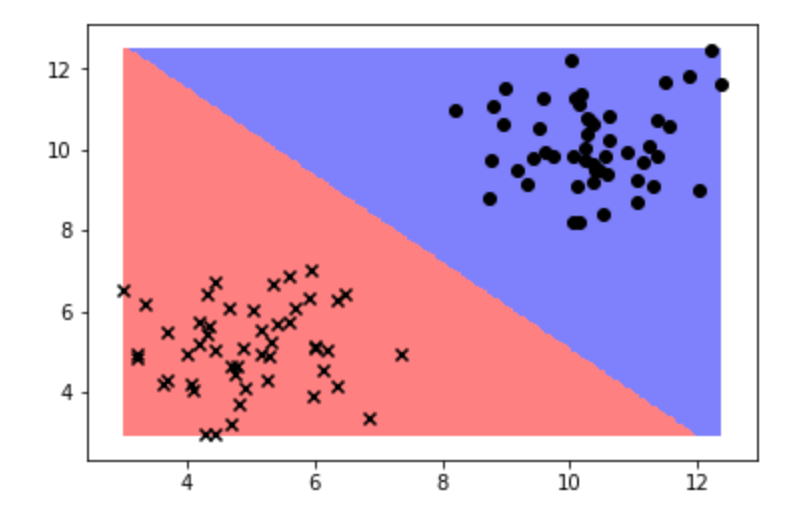

In [ ]:
xTr_spiral,yTr_spiral,xTe_spiral,yTe_spiral = spiraldata()

%matplotlib inline
visualize_2D(xTr_spiral, yTr_spiral)

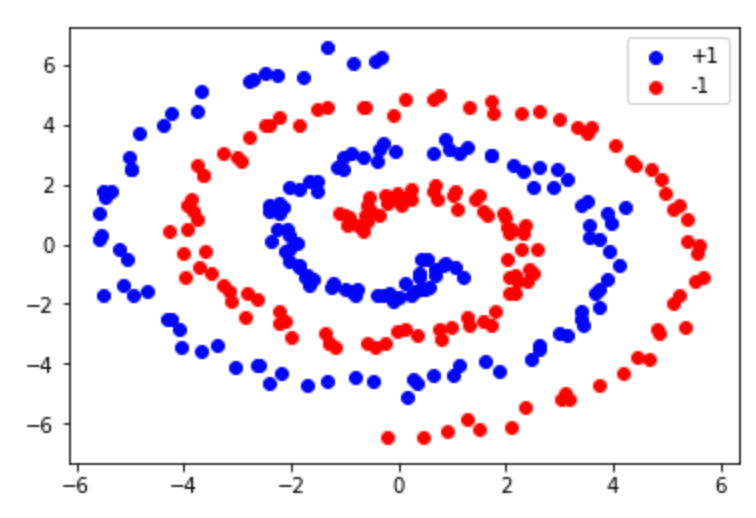

Since the dataset is nonlinear, we are going to use the RBF kernel.

In [ ]:
beta_sol_spiral, bias_sol_spiral, final_loss_spiral = minimize(objective=loss, grad=grad, xTr=xTr_spiral, yTr=yTr_spiral, C=100, kerneltype='rbf', kpar=1)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss_spiral))

K_nn = computeK('rbf', xTr_spiral, xTr_spiral, kpar=1)
reg = beta_sol_spiral @ K_nn @ beta_sol_spiral
print('The Final Squared Hinge Loss of your model is: {:0.4f}'.format(final_loss_spiral - reg))

The Final Loss of your model is: 68.9288

The Final Squared Hinge Loss of your model is: 0.5898

In [ ]:
svmclassify_spiral = lambda x: np.sign(computeK('rbf', xTr_spiral, x, 1).transpose().dot(beta_sol_spiral) + bias_sol_spiral)

predsTr_spiral = svmclassify_spiral(xTr_spiral)
trainingerr_spiral = np.mean(predsTr_spiral != yTr_spiral)
print("Training error: %2.4f" % trainingerr_spiral)

predsTe_spiral = svmclassify_spiral(xTe_spiral)
testerr_spiral = np.mean(predsTe_spiral != yTe_spiral)
print("Test error: %2.4f" % testerr_spiral)

Training error: 0.0033

Test error: 0.0000

In [ ]:
visclassifier(svmclassify_spiral, xTr_spiral, yTr_spiral)

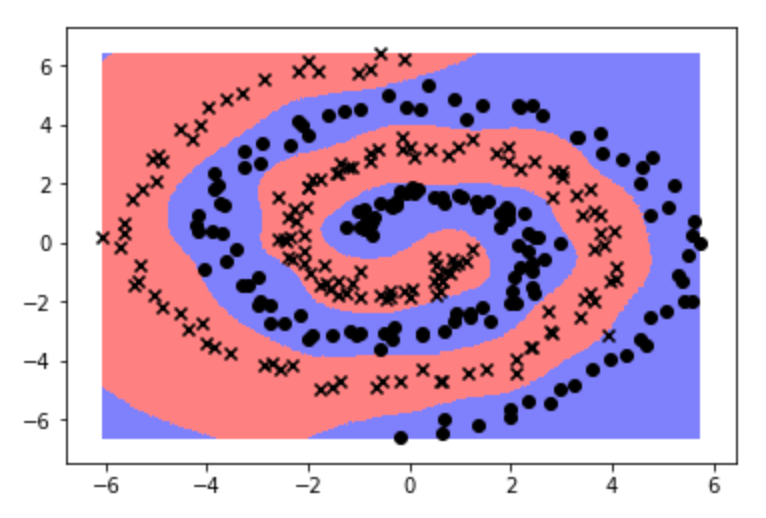

# **Interactive Demo**

In [ ]:
Xdata = []
ldata = []
svmC=10;

fig = plt.figure()
details = {
    'ax': fig.add_subplot(111),
}

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Click to add positive point and shift+click to add negative points.')

def vis2(fun,xTr,yTr):
    yTr = np.array(yTr).flatten()
    symbols = ["ko","kx"]
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    classvals = np.unique(yTr)
    res=150
    xrange = np.linspace(0,1,res)
    yrange = np.linspace(0,1,res)
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T
    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T
    testpreds = fun(xTe)
    Z = testpreds.reshape(res, res)
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c,0],
            xTr[yTr == c,1],
            marker=marker_symbols[idx],
            color='k'
           )
    plt.show()


def generate_onclick(Xdata, ldata):
    global details
    def onclick(event):
        if event.key == 'shift':
            # add positive point
            details['ax'].plot(event.xdata,event.ydata,'or')
            label = 1
        else: # add negative point
            details['ax'].plot(event.xdata,event.ydata,'ob')
            label = -1
        pos = np.array([event.xdata, event.ydata])
        ldata.append(label)
        Xdata.append(pos)

        X=np.array(Xdata)
        Y=np.array(ldata)
        beta_sol, bias_sol, final_loss = minimize(objective=loss, grad=grad, xTr=X, yTr=Y, C=svmC, kerneltype='rbf', kpar=1)
        svmclassify_demo = lambda x: np.sign(computeK('rbf', X, x, 1).transpose().dot(beta_sol) + bias_sol)
        vis2(svmclassify_demo, X, Y)
    return onclick


cid = fig.canvas.mpl_connect('button_press_event', generate_onclick(Xdata, ldata))
plt.show()

# **Scikit-learn Implementation**
Scikit-learn provides a variety of kernels to create kernel SVM classifiers. Here's an example on the spiral dataset.

In [ ]:
from sklearn.svm import SVC

clf = SVC(
    C=100,
    kernel='rbf',
    gamma=1, # equivalent to kpar in our implementation
    shrinking=False,
    tol=1e-8, # early stopping threshold, solver stops when successive losses don't change more than tol
    max_iter=10000,
    random_state=0
)
clf.fit(xTr_spiral, yTr_spiral)

predsTr_spiral = clf.predict(xTr_spiral)
trainingerr_spiral = np.mean(predsTr_spiral != yTr_spiral)
print("Training error: %2.4f" % trainingerr_spiral)

predsTe_spiral = clf.predict(xTe_spiral)
testerr_spiral = np.mean(predsTe_spiral != yTe_spiral)
print("Test error: %2.4f" % testerr_spiral)

Training error: 0.0000

Test error: 0.0000